# Parser comparison

This notebook lets you visualize side-by-side how each parser analyzes a document, and compare the resulting tables.


# Install camelot

In [1]:
!pip install camelot-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 113.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 101.2 MB/s eta 0:00:00


In [2]:
# Bootstrap and common imports
import sys, time, os

sys.path.insert(
    0, os.path.abspath("")
)  # Prefer the local version of camelot if available
import camelot

print(f"Using camelot v{camelot.__version__}.")

Using camelot v1.0.9.


## Select a PDF file to review

You can modify the section below to point to a pdf or your choice to visualize the results.  By default, it points to one of the test .pdfs included with camelot.
This is seeded with the unit test files for convenience.

In [ ]:
kwargs = {}
data = None
# pdf_file = "vertical_header.pdf"  # test_network_vertical_header
# pdf_file, kwargs = "vertical_header.pdf", {"pages": "all"}  # test_network_vertical_headerpages
# pdf_file, kwargs = "background_lines_1.pdf", {"process_background": True} # {"process_background": True}  # test_lattice_process_background

# pdf_file, kwargs, data = "superscript.pdf", {"flag_size": True}, data_stream_flag_size  # test_network_flag_size
# pdf_file, kwargs = "superscript.pdf", {"flag_size": True} # , data_stream_flag_size  # test_network_flag_size
# pdf_file = "health.pdf"  # test_network
# pdf_file = "clockwise_table_2.pdf"
# pdf_file = "clockwise_table_1.pdf"
# pdf_file = "foo.pdf"
# pdf_file, kwargs = "saturation_threshold.pdf", {"process_color_background": False, "process_background": True, "saturation_threshold": 5, "threshold_blocksize": 25}  # "process_background": True,

# pdf_file = "birdisland.pdf"
# pdf_file, kwargs = "diesel_engines.pdf", {"pages": "4-5"} # containing multiple pages 2-4 = hybrid error same for 3-4,2-3

# pdf_file, kwargs = "column_span_1.pdf", {"copy_text": "h"}
# pdf_file = "tabula/12s0324.pdf"  # interesting because contains two separate tables
# pdf_file, kwargs = "tabula/12s0324.pdf", {"strip_text": " ,\n"}   # interesting because contains two separate tables
# pdf_file, kwargs = "tabula/us-007.pdf", {"table_regions": ["320,335,573,505"]} # test_network_table_regions
# pdf_file, kwargs = "tabula/us-007.pdf", {"table_areas": ["320,500,573,335"]} # test_network_table_areas
# pdf_file, kwargs = "detect_vertical_false.pdf", {"strip_text": " ,\n"}  # data_stream_strip_text
# pdf_file = "detect_vertical_false.pdf" #
# pdf_file, kwargs, data = "tabula/m27.pdf", {"columns": ["72,95,209,327,442,529,566,606,683"], "split_text": True, }, data_stream_split_text  # data_stream_split_text
# pdf_file, kwargs= "tabula/m27.pdf", {"columns": ["72,95,209,327,442,529,566,606,683"], "split_text": True, } # , data_stream_split_text  # data_stream_split_text

# pdf_file = "clockwise_table_2.pdf"  # test_network_table_rotated / test_stream_table_rotated
# pdf_file, kwargs = "clockwise_table_2.pdf", {"edge_tol": 10}  # configurable vgap header search not working
# edge_tol 0 gives an error
pdf_file = "vertical_header.pdf"

# pdf_file = "twotables_2.pdf"
# pdf_file = "camelot-issue-132-multiple-tables.pdf"
# pdf_file = "multiple_tables.pdf" # fixes issue 132
# pdf_file, kwargs, data = "edge_tol.pdf", {"edge_tol": 500}, data_stream_edge_tol
# pdf_file, kwargs = "edge_tol.pdf", {"edge_tol": 500} # , data_stream_edge_tol
# pdf_file, kwargs, data = "edge_tol.pdf", {}, data_stream_edge_tol

# pdf_file = "tabula/arabic.pdf"
# pdf_file = "tabula/indictb1h_14.pdf" # interesting mixed type table
# pdf_file = "tabula/m27.pdf" # one table spanning multiple pages
# pdf_file = "tabula/mednine.pdf" # one table spanning multiple pages

# pdf_file = "tabula/spreadsheet_no_bounding_frame.pdf
# pdf_file, kwargs = "diesel_engines.pdf", {"pages": "4-5"} # containing multiple pages

# pdf_file, kwargs = "tabula/schools.pdf", {"pages": "all"}  # network parser hangs on contour plot

filename = os.path.join(
    os.path.dirname(os.path.abspath(".")), "src/tests/files", pdf_file
)

In [3]:
filename="/content/page_1.pdf"

In [5]:
FLAVORS = ["stream", "lattice", "network", "hybrid"]
tables_parsed = {}
parses = {}
max_tables = 0
for idx, flavor in enumerate(FLAVORS):
    timer_before_parse = time.perf_counter()
    error, tables = None, []
    try:
        tables = camelot.read_pdf(filename, flavor=flavor, debug=True,)
    except ValueError as value_error:
        error = f"Invalid argument for parser {flavor}: {value_error}"
        print(error)
    timer_after_parse = time.perf_counter()
    max_tables = max(max_tables, len(tables))

    parses[flavor] = {
        "tables": tables,
        "time": timer_after_parse - timer_before_parse,
        "error": error,
    }

    print(f"##### {flavor} ####")
    print(f"Found {len(tables)} table(s):")
    for idx, table in enumerate(tables):
        flavors_matching = []
        for previous_flavor, previous_tables in tables_parsed.items():
            for prev_idx, previous_table in enumerate(previous_tables):
                if previous_table.df.equals(table.df):
                    flavors_matching.append(f"{previous_flavor} table {prev_idx}")
        print(f"## Table {idx} ##")
        if flavors_matching:
            print(f"Same as {', '.join(flavors_matching)}.")
        else:
            display(table.df)
            print("")
    tables_parsed[flavor] = tables

##### stream ####
Found 1 table(s):
## Table 0 ##


,0,1,2,3,4
0,Account name:,BEST 1 COMPANY PTY LTD,,,
1,Account number:,443210631997,,,
2,Date,Transaction Detail,Debit,Credit,Balance
3,30/06/2024,POS 14533300 30 JUN,,"1,582.59","93,317.67"
4,29/06/2024,POS 14533300 29 JUN,,"1,936.45","91,735.08"
5,28/06/2024,POS 14533300 28 JUN,,"1,345.84","89,798.63"
6,27/06/2024,POS 14533300 27 JUN,,"1,071.51","88,452.79"
7,27/06/2024,XERO AU INV-36226448,125.00,,"87,381.28"
8,26/06/2024,POS 14533300 26 JUN,,749.39,"87,506.28"
9,25/06/2024,POS 14533300 25 JUN,,906.57,"86,756.89"



##### lattice ####
Found 0 table(s):
##### network ####
Found 2 table(s):
## Table 0 ##


,0,1,2,3
0,Report from,01/07/2023,Opening balance,"$198,963.93"
1,Report to,30/06/2024,Closing balance,"$93,317.67"
2,,,Currency,AUD
3,Account name:,BEST 1 COMPANY PTY LTD,,



## Table 1 ##


,0,1,2,3,4
0,Report from,01/07/2023,,Opening balance,"$198,963.93"
1,Report to,30/06/2024,,Closing balance,"$93,317.67"
2,,,Currency,,AUD
3,Account name:,BEST 1 COMPANY PTY LTD,,,
4,Account number:,443210631997,,,
5,Date,Transaction Detail,Debit,Credit,Balance
6,30/06/2024,POS 14533300 30 JUN,,"1,582.59","93,317.67"
7,29/06/2024,POS 14533300 29 JUN,,"1,936.45","91,735.08"
8,28/06/2024,POS 14533300 28 JUN,,"1,345.84","89,798.63"
9,27/06/2024,POS 14533300 27 JUN,,"1,071.51","88,452.79"



##### hybrid ####
Found 2 table(s):
## Table 0 ##
Same as network table 0.
## Table 1 ##
Same as network table 1.


## Show tables layout within original document

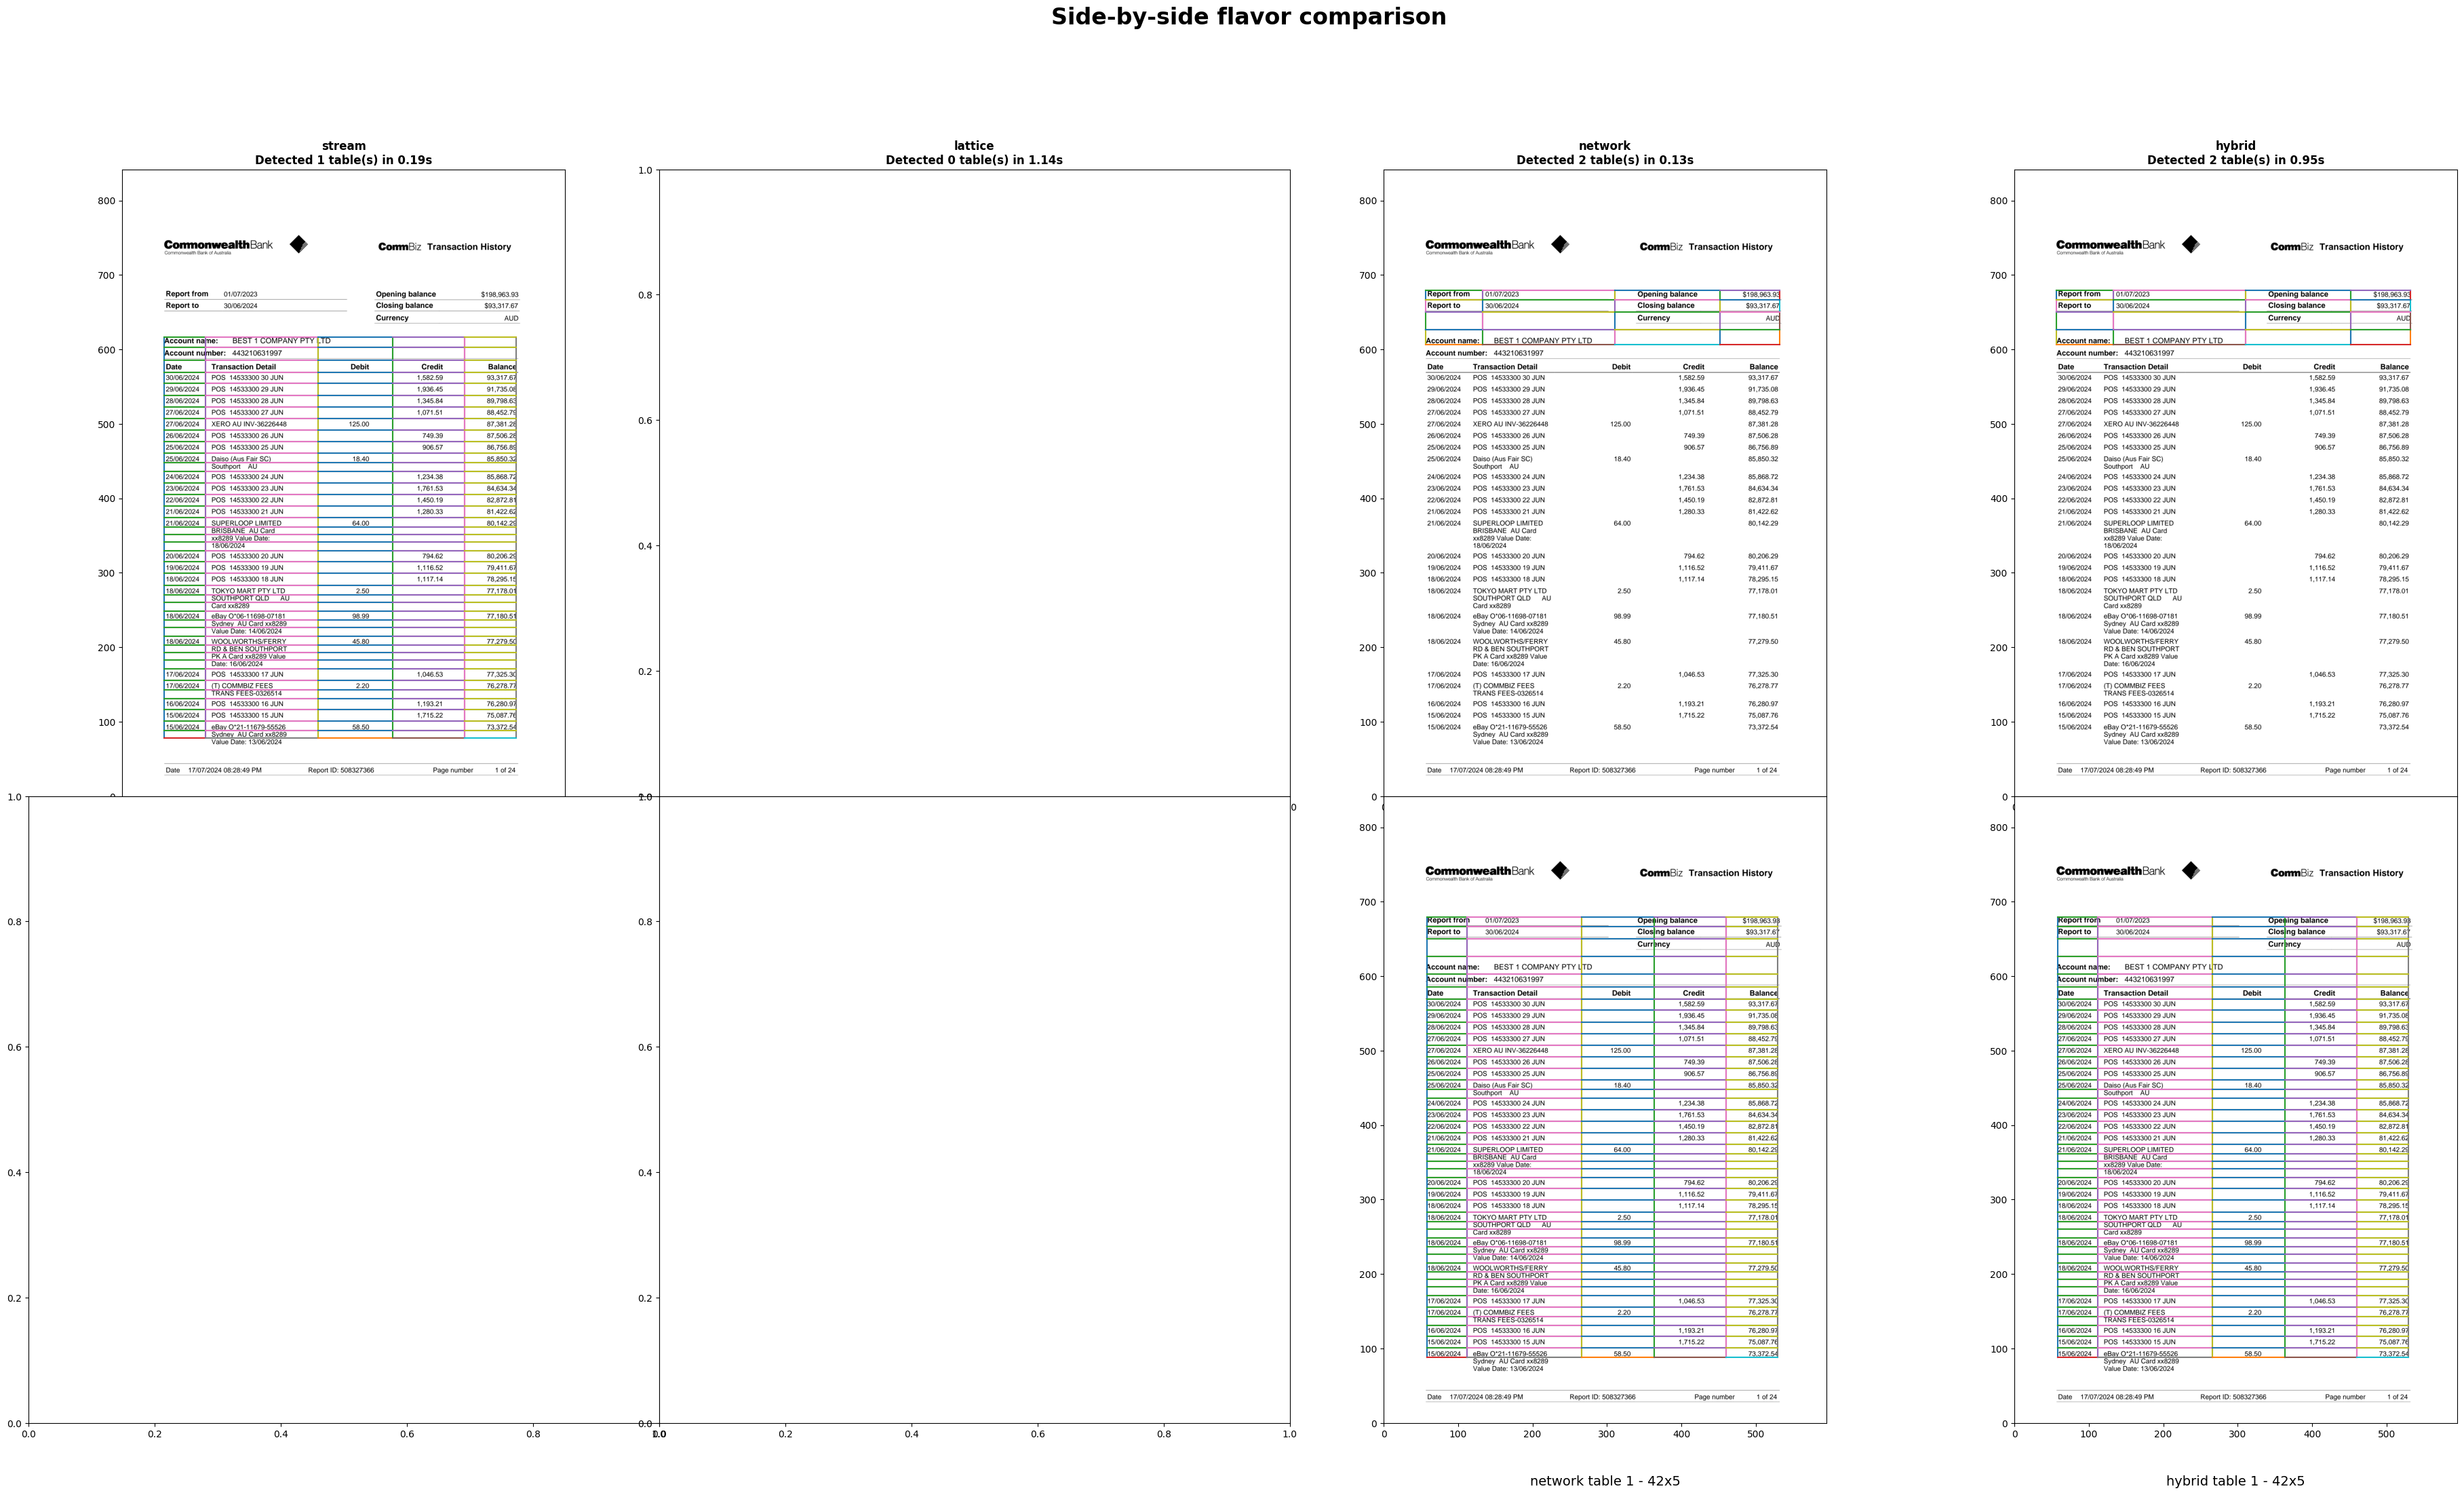

In [6]:
# Set up plotting options
import matplotlib.pyplot as plt

# %matplotlib inline
PLOT_HEIGHT = 12

row_count = max(max_tables, 1)
plt.rcParams["figure.figsize"] = [PLOT_HEIGHT * len(FLAVORS), PLOT_HEIGHT * row_count]
fig, axes = plt.subplots(row_count, len(FLAVORS))
plt.subplots_adjust(wspace=0, hspace=0)  # Reduce margins to maximize the display zone

fig.suptitle("Side-by-side flavor comparison", fontsize=24, fontweight="bold")
for idx, flavor in enumerate(FLAVORS):
    parse = parses[flavor]
    tables = parse["tables"]
    top_ax = axes.flat[idx]
    title = f"{flavor}\n" f"Detected {len(tables)} table(s) in {parse['time']:.2f}s"
    if parse["error"]:
        title = title + f"\nError parsing: {parse['error']}"
    top_ax.set_title(title, fontsize=12, fontweight="bold")
    for table_idx, table in enumerate(tables):
        if max_tables > 1:
            ax = axes[table_idx][idx]
        else:
            ax = axes[idx]
        # Check if the table has data before attempting to plot it
        if (
            table.shape[0] > 0 and table.shape[1] > 0
        ):  # Check if table has rows and columns
            fig = camelot.plot(table, kind="grid", ax=ax)
            ax.text(
                0.5,
                -0.1,
                "{flavor} table {table_idx} - {rows}x{cols}".format(
                    flavor=flavor,
                    table_idx=table_idx,
                    rows=table.shape[0],
                    cols=table.shape[1],
                ),
                size=14,
                ha="center",
                transform=ax.transAxes,
            )
        else:
            print(
                f"Skipping plotting for empty table {table_idx} in {flavor}"
            )  # Inform user about the skipped table
        timer_after_plot = time.perf_counter()